In [17]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import MinMaxScaler

C:\Users\Katlic\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [70]:
img_file = "0.png"

In [71]:
x = data.data
y = data.target
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img, (8,8), interpolation=cv2.INTER_AREA)
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

1.0


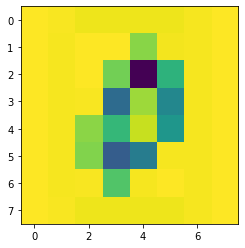

In [72]:
s = SVC(C=5.0, gamma=0.22)
s.fit(x,data.target)
print(s.score(x,data.target))
scaler = MinMaxScaler()
scaler.fit(img2.reshape(-1,1))
scaler.transform(img2.reshape(-1,1).reshape(8,8))
plt.imshow(scaler.transform(img2.reshape(-1,1).reshape(8,8)))
output = scaler.transform(img2.reshape(-1,1).reshape(8,8)).ravel()

In [73]:
print("Predicted Output : ",s.predict([1-output])[0])

Predicted Output :  4


In [ ]:
# random forest
# decision making tree

## Decision Making Tree

In [122]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
data = load_iris()
x = data.data
y = data.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [127]:
#function Copied from Scikit Learn Confusion matrix Web Link
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [117]:
df = pd.read_csv('hamspam.csv', index_col='Unnamed: 0')
df.columns = ['Label', 'News']
y = df.Label
x = df.drop(['Label'], axis=1)
x_train,y_train,x_test,y_test = train_test_split(x['News'],y, test_size=0.2, random_state = 42)
count_vector_obj = CountVectorizer(stop_words="english")
count_train = count_vector_obj.fit_transform(x_train)
count_test = count_vector_obj.transform(x_test)

In [121]:
count_test.toarray().shape

(4453, 7520)

In [123]:
df = pd.read_csv('hamspam.csv', index_col='Unnamed: 0')
df.columns = ['Label', 'News']
y = df.Label
x = df.drop(['Label'], axis=1)
x_train,y_train,x_test,y_test = train_test_split(x['News'],y, test_size=0.2, random_state = 42)
normal_vector_obj = TfidfVectorizer(stop_words="english")
normal_train = normal_vector_obj.fit_transform(x_train)
normal_test = normal_vector_obj.transform(x_test)

In [124]:
normal_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
normal_vector_obj.get_feature_names()[-10:]

['zhong',
 'zindgi',
 'zoe',
 'zogtorius',
 'zoom',
 'zouk',
 'zyada',
 'èn',
 'ú1',
 '〨ud']

In [126]:
count_vector_obj.get_feature_names()[-10]

'zhong'

In [130]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.fit_transform(x_test)

# Imported as sir's code from ProtectedText

#function Copied from Scikit Learn Confusion matrix Web Link
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np

clf = MultinomialNB(alpha=0.5)

clf.fit(count_train, y_train)

pred = clf.predict(count_test)

pred.shape

metrics.accuracy_score(y_test, pred)

cm = metrics.confusion_matrix(y_test, pred, labels=['spam', 'ham'])

import itertools
plot_confusion_matrix(cm,classes=['spam','ham'])

ValueError: Found input variables with inconsistent numbers of samples: [4453, 1114]